## Pytorch ConvNet

We will now build a simple convolutional neural network using Pytorch's built-in funcitonality to do image classification.


In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from pytorch_utils import load_dataset, predict_image, get_lr, show_signs, get_accuracy
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.manual_seed(1337)
np.random.seed(1337)

# 2 - Building your first neural network in Pytorch

In this part of the assignment you will build a neural network using Pytorch. 
Let's delve into the problem you'd like to solve!

### 2.0 - Problem statement: SIGNS Dataset

Let's teach our computers to decipher sign language. The following dataset was constructed from taking pictures in front of a white wall. It's now your job to build an algorithm that would facilitate communications from a speech-impaired person to someone who doesn't understand sign language.

- **Training set**: 1080 pictures (64 by 64 pixels) of signs representing numbers from 0 to 5 (180 pictures per number).
- **Test set**: 120 pictures (64 by 64 pixels) of signs representing numbers from 0 to 5 (20 pictures per number).

Note that this is a subset of the SIGNS dataset. The complete dataset contains many more signs.

Here are examples for each number and an explanation of how we represent the labels. These are the original pictures, before we lowered the image resolutoion to 64 by 64 pixels.
<img src="images/hands.png" style="width:800px;height:350px;"><caption><center> <u><font color='purple'> **Figure 1**</u><font color='purple'>: SIGNS dataset <br> <font color='black'> </center>


Run the following code to load the dataset.

In [2]:
# Loading the dataset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = show_signs()

Change the index below and run the cell to visualize some examples in the dataset.

y = 5


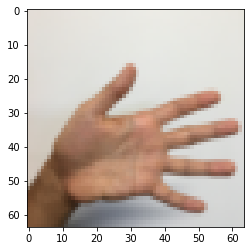

In [3]:
# Example of a picture
index = 0
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [4]:
print ("X_train_orig shape: " + str(X_train_orig.shape))
print ("Y_train_orig shape: " + str(Y_train_orig.shape))
print ("X_test_orig shape: " + str(X_test_orig.shape))
print ("Y_test_orig shape: " + str(Y_test_orig.shape))

X_train_orig shape: (1080, 64, 64, 3)
Y_train_orig shape: (1, 1080)
X_test_orig shape: (120, 64, 64, 3)
Y_test_orig shape: (1, 120)


### 2.1 - Dataloader and TensorDataset

In order to use Pytorch in the most convienient way possible, we need to convert our numpy matrices to Pytorch Tensor objects and then to Pytorch Datasets and then finally to Pytorch DataLoaders. This will make dealing with batches during the training of our neural network much easier. In the following section, you will use specialized Pytorch functions to do this conversion.

First, we need to reload the data in the format that Pytorch expects. This has been done for you. Please run the following cell.

In [5]:
X_train, Y_train, X_test, Y_test, classes = load_dataset()
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

X_train shape: (1080, 3, 64, 64)
Y_train shape: (1080, 1)
X_test shape: (120, 3, 64, 64)
Y_test shape: (120, 1)


The data is identical, but now in the format that Pytorch expects. If your remember my first neural network class from 2018, you might realize that Pytorch uses the same convention I talked about then.

Now it's time to convert the data. 

**Exercise**: Implement the data conversion funtion. In this function you will use the following Pytorch implementations:
- `torch.tensor(..., ...)`
- `TensorDataset(..., ...)`
- `DataLoader(..., ...)`


torch.tensor will convert your numpy matrices to tensor objects. On the training set, standard procedure is the following:
```python
    X_train_tensor = torch.tensor(X_train, dtype=torch.float)
    Y_train_tensor = torch.tensor(Y_train, dtype=torch.long)
```

TensorDataset converts the tensor objects into Dataset objects. A lot of effort in solving any machine learning problem goes in to preparing the data. PyTorch provides many tools to make data loading easy and, hopefully, to make your code more readable. On the training set, standard procedure is the following:
```python 
    train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
```
Finally, the Dataloader class allows us to batch, shuffle, and load the data in parallel for multiprocessing. It is optimized, so it's fast, readable, and hopefully bug free. On the training set, standard procedure is the following:

```python
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
```
Notice we can specify the batch size and whether or not we'd like to mix up (shuffle) the data.


Please check out https://pytorch.org/tutorials/beginner/data_loading_tutorial.html if you'd like to learn more about these implementations.

In [6]:
# GRADED FUNCTION: data_conversion
def data_conversion(X_train, Y_train, X_test, Y_test, batch_size=64):
    """
    Converts numpy matrices to Pytorch data objects
    
    Arguments:
    X_train -- matrix of training data
    Y_train -- vector of training labels
    X_test -- matrix of test data
    Y_test -- vector of test labels
    batch_size -- int that specifies the batch size.
    
    Returns:
    train_dataset, test_dataset, train_loader, test_loader -- 
    objects that make training neural networks in Pytorch easier.
    """
    
    ###START CODE HERE###
    #Create the X_train and Y_train tensor. Don't forget to divide the X tensor 
    # by 255 for max value normalization.
    #(approx. 2 lines)
    X_train_tensor = torch.tensor(X_train, dtype=torch.float)/255
    Y_train_tensor = torch.tensor(Y_train, dtype=torch.long)

    #Create the X_test and Y_test tensor. Don't forget to divide the X tensor 
    #by 255 for max value normalization.
    #(approx. 2 lines)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float)/255
    Y_test_tensor = torch.tensor(Y_test, dtype=torch.long)

    #Create the train and test dataset using TensorDataset.  (approx. 2 lines)    
    train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
    
    #Create the train and test dataloaders using DataLoad. 
    #Set the batch_size = batch_size and shuffle = True
    #(approx. 2 lines) 
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
    ###END CODE HERE###

    return train_dataset, test_dataset, train_loader, test_loader


In [7]:
train_dataset, test_dataset, train_loader, test_loader = data_conversion(X_train, Y_train, X_test, Y_test)

In [8]:
print(train_dataset)
print(test_dataset)
print(train_loader)
print(test_loader)

If you're curious about the tensor objects, please consider the code below. Note, for example, that `size`, a Pytorch method, yields the same output as `shape` from numpy.

In [9]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.long)

X_test_tensor = torch.tensor(X_test, dtype=torch.float)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.long)

In [10]:
print("X_train_tensor shape: {}".format(X_train_tensor.shape))
print("Y_train_tensor shape: {}".format(Y_train_tensor.shape))
print("X_test_tensor shape: {}".format(X_test_tensor.shape))
print("Y_test_tensor shape: {}".format(Y_test_tensor.shape))
print("X_train_tensor size: {}".format(X_train_tensor.size()))
print("Y_train_tensor size: {}".format(Y_train_tensor.size()))
print("X_test_tensor size: {}".format(X_test_tensor.size()))
print("Y_test_tensor size: {}".format(Y_test_tensor.size()))

X_train_tensor shape: torch.Size([1080, 3, 64, 64])
Y_train_tensor shape: torch.Size([1080, 1])
X_test_tensor shape: torch.Size([120, 3, 64, 64])
Y_test_tensor shape: torch.Size([120, 1])
X_train_tensor size: torch.Size([1080, 3, 64, 64])
Y_train_tensor size: torch.Size([1080, 1])
X_test_tensor size: torch.Size([120, 3, 64, 64])
Y_test_tensor size: torch.Size([120, 1])


We can still examine the data, even after being converted to Pytorch objects.

(3, 64, 64)
(64, 64, 3)
y = 2


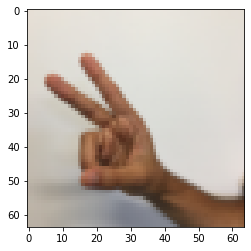

In [11]:
#Example of a picture
index = 6
img = np.array(train_dataset[index][0])

print(img.shape)
img = img.transpose(1, 2, 0)
print(img.shape)
plt.imshow(img)
print ("y =", str(np.squeeze(train_dataset[index][1].numpy())))

In [12]:
print(img.shape)

(64, 64, 3)


## 2.2 Building the network
**Your goal** is to build an algorithm capable of recognizing a sign with high accuracy. To do so, you are going to build a convolutional neural network. It is a great occasion to compare your numpy implementation to your pytorch implementation. 

**The model** is *CONV2D-> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> LINEAR -> SOFTMAX*. The SIGMOID output layer has been converted to a SOFTMAX. A SOFTMAX layer generalizes SIGMOID to when there are more than two classes. 


In detail, we will use the following parameters for all the steps:

 - Conv2D: stride 1, padding is "SAME"
 - ReLU
 - Max pool: Use an 8 by 8 filter size and an 8 by 8 stride, padding is "SAME"
 - Conv2D: stride 1, padding is "SAME"
 - ReLU
 - Max pool: Use a 4 by 4 filter size and a 4 by 4 stride, padding is "SAME"
 - Flatten the previous output.
 - Linear layer: Apply a fully connected layer without an non-linear activation function. Do not call the softmax here. This will result in 6 neurons in the output layer, which then get passed later to a softmax. In Pytorch, the softmax and cost function are lumped together into a single function, which you'll call in a different function when computing the cost. 


It's convention in Pytorch to make a network python class. For example:
```python
    class Net(nn.Module):

        def __init__(self):
            super(Net, self).__init__()
            self.fc1 = nn.Linear(0th layer dimension, 1st layer dimension)
            self.fc2 = nn.Linear(1st layer dimension, 2nd layer dimension)
            self.fc3 = nn.Linear(2nd layer dimension, 3rd layer dimension)
            ...
            self.fcL = nn.Linear(L-1 layer dimension, L layer dimension)

        def forward(self, x):
            x = x.to(device).view(-1, 0th layer dimension)
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))
            x = F.relu(self.fc3(x)
            ...
            x = self.fcL(x)        
            return x
                       
                       ```
In the above example, fc refers to "fully connected", which is the type of network we have been studying. The number is the layer we are on. The nn.Linear function is identical to our Z calculation. We then apply the non-linearity to the corresponding Z calculation in the forward method. Finally the softmax function will be applied automatically by Pytorch when we select the cost function. This is different than the binary case, where we would have to apply the sigmoid function to the final layer.
        

##### Exercise: Complete the class below based on the layer dimensions and the above example.

In [13]:
# GRADED CLASS: Net
torch.manual_seed(1337)
class ConvNet(nn.Module):
    '''
    Pytorch network class
    Arguments -- x which is some data
    
    Output -- x, which is the network's prediction
    Conv2D: 3 channels in, 8 channels out, stride 1, padding is "SAME"
    ReLU
    Max pool: Use an 8 by 8 filter size and an 8 by 8 stride, padding is "SAME"
    Conv2D: 8 channels in, 16 channels out, stride 1, padding is "SAME"
    ReLU
    Max pool: Use a 4 by 4 filter size and a 4 by 4 stride, padding is "SAME"
    Flatten the previous output. (64, number of classes)
    '''
    def __init__(self):
        super().__init__()
        ###START CODE HERE### (approx 4 lines)
        self.conv1 = nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1)
        self.maxpool1 = nn.MaxPool2d(8, 8)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1)
        self.maxpool2 = nn.MaxPool2d(4, 4)
        ###END CODE HERE###
        self.flat = nn.Flatten()
        self.linear1 = nn.Linear(64, 6)
        
        
    def forward(self, x):
        ###START CODE HERE### (approx 4 ~ 6 lines)
        x = torch.relu(self.conv1(x))       
        x = self.maxpool1(x)
        x = torch.relu(self.conv2(x))
        x = self.maxpool2(x)
        ###END CODE HERE###
        x = self.flat(x)
        return self.linear1(x)

    
convnet = ConvNet()

## 2.3 Loss function and Optimizer

Let's now choose the loss function and which optimizer we will use to update our neural network parameters.

Above, we used `nn.BCELoss()`. BCE, as you may have guessed, stands for binary cross entropy. In the multiclass or nonbinary case, the most commonly used loss function is `nn.CrossEntropyLoss()`. In Pytorch convention, the loss/cost function is called `criterion`. We define the multiclass cross entropy cost as
$$ J = - \frac{1}{m}  \sum_{i = 1}^m \sum_{j = 1}^C  \large  \small y_j \log (\hat y_j )$$

the derivative of $J$ w.r.t $z^{[L]}$ is very familar to us already:
$$ \frac{\partial J}{\partial{z^{[L]}}}= \hat y - y $$

where $y_j$ is a given element of our one-hot encoded vector from our one-hot matrix of labels $Y$, $ \hat y_j$ is a given element of a vector from the $\hat Y$ matrix of the model's output after the final activation function, $C$ is the number of classes, and $m$ is the number of data examples. 

In multiclass classification, the most commonly used activation function at the final layer of a neural network is the softmax function. Note that a softmax classifier is a generalization of logistic regression to the case where $y$ represents more than 2 classes. We define the softmax function to be

$$ t = \exp(z^{[L]}) $$
$$ \hat y = softmax(z^{[L]}) = \frac{t_j}{\sum_{j=1}^C t_j} $$

where $z^{[L]}$ is the linear calculation of our final layer before applying the activation function.

If you're curious, the derivative of the softmax function is defined below. Doesn't it look similar to the sigmoid function derivative? This not a coincidence.

$$ \frac{\partial}{\partial{t_j}}softmax(z^{[L]})=(1−softmax(t_j))∗softmax(t_j)$$

Normally, we would need all of these equations to use optimization algorithms, such as Adam or gradient descent. Thanks to Pytorch, though, we are not required to code up the loss function, softmax, or any of it's derivative as this is all included in `nn.CrossEntropyLoss()`.


On to the optimization algorithm. In this simple example, let's use `optim.SGD(...,...)` for optimization. SGD stands for stochastic gradient descent, which will perform stochastic/mini-batch/batch gradient descent depending on the batch size. We call this variable `optimizer` in Pytorch convention and pass it the parameters we wish to optimize and a number of different hyperparameters. Here, the only hyperparameter we are considering is `lr`, or the learning rate $ \alpha $, which we set to be $ 0.001$. The batch size was set to $64$ in the our data_conversion function above. You are welcome to tune this hyperparameter as well. 

Consider and run the code below to initialize these variables.

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(convnet.parameters())

`parameters` is a Pytorch method which simiply tells the optimizer the parameter architecture of our model. Consider the code below.

In [15]:
convnet.parameters

<bound method Module.parameters of ConvNet(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=8, stride=8, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (flat): Flatten()
  (linear1): Linear(in_features=64, out_features=6, bias=True)
)>

Please see the Pytorch documentation for further information on building networks, choosing loss functions, and optimizers:

        https://pytorch.org/docs/stable/nn.html
        
        https://pytorch.org/docs/stable/optim.html


## 3.0 Train our network

The time has come to optimize our parameters with Pytorch. Consider the following code for optimization:

```python
for epoch in range(epochs+1):
        
        #Initialize an accumlator variable
        running_loss = 0.0
        #Iterate through the batches
        for output, target in data_loader:     
            #Compute model's prediction of X of the current minibatch: X^{t}
            output = model(output)
            #Flatten the target variable
            target = target.view(-1)
            #Compute the loss for the model's prediction and the true value of Y^{t}
            loss = criterion(output, target)
            #Add the current batch's loss to our running loss
            running_loss += loss.item()
            #Reset gradient
            optimizer.zero_grad()
            #Compute the derivate of the loss w.r.t each parameter via backprop 
            loss.backward()
            #Use the optimizer to update parameters of neural network
            optimizer.step()
            
        #Normalize accumlator variable by number of batches (plotting/hyperparameter tuning/debugging purposes)
        loss = running_loss / len(data_loader)

```
Most Pytorch code follows the convention shown above. We iterate through a data set in batches, compute the model's guess for a given batch, compute the loss relative to that batch, (re)set the gradient to zero, compute the gradient via backprop, and take one step (descend the gradient) with our optimizer. During this loop, we acculate the loss values in an accumulator variable. Once the loops is completed, we normalize this value by m_batch, the number of batches. We have then completed one epoch of training. Note that `view` and `item` are Pytorch code similar to both `numpy reshape` or `numpy squeeze`. In many cases they can be used interchangably.

See https://discuss.pytorch.org/t/what-step-backward-and-zero-grad-do/33301 and https://pytorch.org/docs/stable/tensors.html for more information.

##### Exercise: Complete the update_parameters function below based on the above example.

In [16]:
#GRADED FUNCTION: update_parameters
def update_parameters(model, train_loader, test_loader, criterion, optimizer, epochs=200):
    """
    Performs parameter updates for a pytorch model.
    
    Arguments:
    train_loader -- pytorch object for loading train data in batches (python iterator)
    test_loader -- pytorch object for loading test data in batches (python iterator)
    criterion -- criterion, the loss function to be optimized. - nn.CrossEntropyLoss()
    optimizer -- stochastic gradient descent with learning rate of 0.001 as default value
    epochs -- number of epochs of the optimization loop
    """
    torch.manual_seed(1337)
    #Intialize empty lists to accumulate costs and accuracy values on each epoch
    train_costs, test_costs, test_accs, train_accs = [], [], [], []
    model = model.to(device)
    #Start training for loop. epoch is neural network jargon for iteration
    for epoch in range(epochs+1):
        
        #Optimization
        train_loss = 0.0
        for X, Y in train_loader:
            #Send X and Y to a given device for optimized parameter updates (CUDA or CPU)
            output, target = X.to(device), Y.to(device).view(-1)
            ###START CODE HERE###
            #Compute model's prediction of X (approx 1 line)
            output = model(output)
            #Compute the loss for the model's prediction and the true value of Y (approx 1 line)
            loss = criterion(output, target)
            #Add the train loss value to our train loss accumulator
            train_loss += loss.item()
            #Initialize gradient to zero (approx 1 line)
            optimizer.zero_grad()
            #Compute the derivative of the loss w.r.t each parameter via backprop (approx 1 line)
            loss.backward()
            #Use the optimizer to update parameters of neural network (approx 1 line)
            optimizer.step()
            ###END CODE HERE###
        #normalize loss by m_train and add to train_costs list
        train_costs.append(train_loss / len(train_loader))
        
        #Compute the test loss. The code below does not optimize. It is purely for plotting/comparison purposes.
        test_loss = 0.0
        with torch.no_grad():
            for X, Y in test_loader:
                output, target = X.to(device), Y.to(device).view(-1) 
                ###START CODE HERE###
                #Compute model's guess for X (data) (approx 1 line)
                output = model(output)                
                #Compute loss of X and Y (approx 1 line)
                loss = criterion(output, target)
                #Add test loss of current batch to test loss accumulator (approx 1 line)
                test_loss += loss.item()
                ###END CODE HERE###
            #normalize loss by m_test and add to test_costs list
            test_costs.append(test_loss/len(test_loader))

        
        #Compute and print accuracy for plotting every 100 epochs
        if epoch % 10 == 0:
            test_acc = get_accuracy(model, test_loader)
            test_accs.append(test_acc)
            train_acc = get_accuracy(model, train_loader)
            train_accs.append(train_acc)                            
            print('Epoch: {} | Test Accuracy: {} | Train Accuracy: {}'.format(epoch, test_acc, train_acc))
    
    #plotting
    lr = get_lr(optimizer)
    plt.plot(train_costs, label ='Train Cost')
    plt.plot(test_costs, label ='Test Cost')
    plt.ylabel('Costs')
    plt.xlabel('Epochs')
    plt.title("Learning rate ={}".format(lr))
    plt.legend()
    plt.show()
    
    
    plt.plot(train_accs, label ='Train Accuracy')
    plt.plot(test_accs, label ='Test Accuarcy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs (per hundreds)')
    plt.title("Train and Test Accuracy")
    plt.legend()
    plt.show()
    

Run the cell below to optimize our neural network!

Epoch: 0 | Test Accuracy: 0.16666666666666666 | Train Accuracy: 0.16666666666666666
Epoch: 10 | Test Accuracy: 0.45 | Train Accuracy: 0.47314814814814815
Epoch: 20 | Test Accuracy: 0.7 | Train Accuracy: 0.675
Epoch: 30 | Test Accuracy: 0.775 | Train Accuracy: 0.7898148148148149
Epoch: 40 | Test Accuracy: 0.825 | Train Accuracy: 0.8583333333333333
Epoch: 50 | Test Accuracy: 0.8666666666666667 | Train Accuracy: 0.8833333333333333
Epoch: 60 | Test Accuracy: 0.8583333333333333 | Train Accuracy: 0.9027777777777778
Epoch: 70 | Test Accuracy: 0.875 | Train Accuracy: 0.9074074074074074
Epoch: 80 | Test Accuracy: 0.9 | Train Accuracy: 0.9222222222222223
Epoch: 90 | Test Accuracy: 0.8916666666666667 | Train Accuracy: 0.9101851851851852
Epoch: 100 | Test Accuracy: 0.9 | Train Accuracy: 0.9333333333333333
Epoch: 110 | Test Accuracy: 0.9166666666666666 | Train Accuracy: 0.9518518518518518
Epoch: 120 | Test Accuracy: 0.85 | Train Accuracy: 0.9287037037037037
Epoch: 130 | Test Accuracy: 0.89166666666

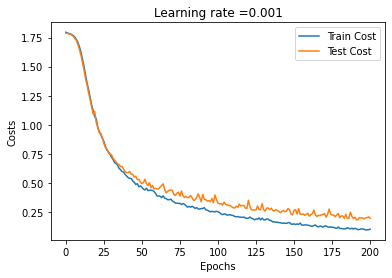

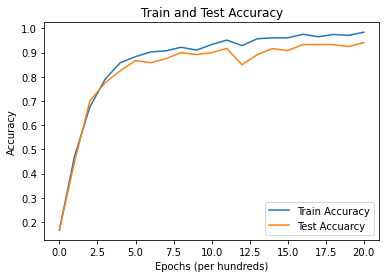

Wall time: 40.3 s


In [17]:
%%time
torch.manual_seed(1337)
update_parameters(convnet, train_loader, test_loader, criterion, optimizer)

**Expected Output**:

<table> 
    <tr> 
        <td>
            **Train Accuracy**
        </td>
        <td>
        ~0.96 - 0.99
        </td>
    </tr>
    <tr> 
        <td>
            **Test Accuracy**
        </td>
        <td>
         ~0.91 - 0.94
        </td>
    </tr>

</table>

Amazing, your algorithm can recognize a sign representing a figure between 0 and 5 with ~94% accuracy and it only took 200 epochs!

**Insights**:
- Your model seems big enough to fit the training set well. However, given the difference between train and test accuracy, you could try to add L2 or dropout regularization to reduce overfitting. 
- You could try changing the learning rate or the optimizer to see how this influences your network's behavior.
- You could additionally try changing the batch size to see how this influences your network's behavior.


Run the cell below to see in depth how your algorithm performs on the test dataset.

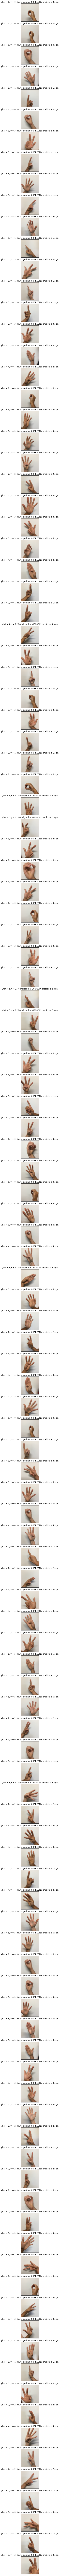

In [18]:
fig = plt.figure(figsize=(300,300))
convnet = convnet.to(device)
for i, data in enumerate(test_dataset):

    X, Y = data
    output, target = X.to(device), Y.to(device).view(-1)
    output = output.reshape(1, 3, 64, 64)
    output = convnet(output)
    _, y_pred = output.data.max(1)
    sub = fig.add_subplot(len(test_dataset), 1, i+1)
    y_hat = y_pred.item()
    y = target.item()
    if y_hat == y:
        result = 'CORRECTLY'
        info = 'yhat = {0}, y = {1}. Your algorithm {2} predicts a {0} sign.'.format(y_hat, y, result)
        
    else:
        result = 'WRONGLY'
        info = 'yhat = {0}, y = {1}. Your algorithm {2} predicts a {0} sign.'.format(y_hat, y, result)
        
    sub.set_title(info)
    sub.imshow(test_dataset[i][0].numpy().transpose([1, 2, 0]))
    sub.set_xticks([])
    sub.set_yticks([])



Run the following cell to see how your network performs on a novel piece of data. Feel free to choose your own picture by changing the path in the my_image variable.

Your algorithm predicts y = 3.


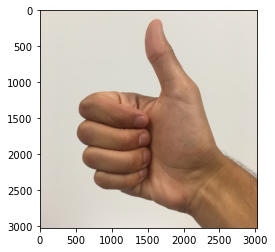

In [19]:
my_image = "images/thumbs_up.jpg"
plt.imshow(plt.imread(my_image))
inp = predict_image(my_image, 64, device)
y_pred = convnet(inp)
_, y_pred_class = y_pred.data.max(1)
print('Your algorithm predicts y = {}.'.format(y_pred_class[0].item()))

You indeed deserved a "thumbs-up" although as you can see the algorithm seems to classify it incorrectly. The reason is that the training set doesn't contain any "thumbs-up", so the model doesn't know how to deal with it! We call that a "mismatched data distribution" which we will talke about more in the future.

<font color='blue'>
**What you should remember**:

    - Pytorch is a programming framework used in deep learning
    - Pytoch is similar to numpy except it has many built-in deep learning functions to make neural network programming easier. 
    - When we code in Pytorch, we typically take the following steps:
        - Create data objects. (tensors, datasets, dataloaders)
        - Create network class. 
        - Declare loss function and optimizer.
        - Update parameters of the network.
        - You don't need to code up networks from scratch!